# Which Markets to Invest In?

The goal of this project is to determine the best markets for our company to invest in. We're an e-learning company that educates people on:

- Data Science
- Game Development
- Mobile Development (One of our primary focuses)
- Web Development (The other primary focus)

Where should we invest for advertisement? Our goal is to answer this question, thereby answering the title.

We begin our analysis below using freeCodeCamp's data. They run a popular website with coding tutorials, and we're going to assess what is popularly chosen there. Because it's voluntary and free, and gives respected certificates, people who are serious about developing their skills choose it. The content they chose will inform our future expenditures.

We choose freeCodeCamp's data, instead of making our own survey, because:

- freeCodeCamp's population is composed of self-selected, determined individuals with an interest in practical computer skills. This is the population we want to examine and cater services towards. Their 2017 data, which we utilize below, takes a sample of 20,000. They have saved us a lot of work by making their own survey freely available.

- This data can be downloaded at: https://github.com/freeCodeCamp/2017-new-coder-survey

In [1]:
#We're loading our tools & data through this cell.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 150
data = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)
# data = data.fillna(0)
print(data.head(5))

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0                   NaN      

# Note on NaNs

We have many NaNs. We are going to leave those alone for now. We will seek to remove them on a case-by-case basis in order to find the most accurate results.

# Is this data representative?

Before we truly begin, we need to determine if this sample is representative for our population of interest. We do that in the cells below.

In [2]:
career_interest = data["JobRoleInterest"].value_counts(normalize=True) * 100
print(career_interest.head(30))

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

Full-Stack Web Developer     11.770595
  Front-End Web Developer     6.435927
  Data Scientist              2.173913
Back-End Web Developer        2.030892
  Mobile Developer            1.673341
Game Developer                1.630435
Information Security          1.315789
Name: JobRoleInterest, dtype: float64


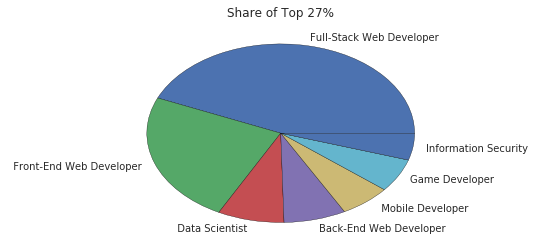

In [3]:
career_7 = career_interest.head(7)
print(career_7)

career_7.plot.pie()
plt.title(s="Share of Top 27%")
plt.ylabel("")

To reiterate: this pie chart shows a share of the top 27% of interest entries. We chose this chart because it includes all interest entries above 1% representation.

# Note on Representation

We can definitely say this sample represents the population we're interested in. These courses are absolutely what we design for.

This data is incredibly granular, but there are some basic points which we can take:

- It's a fair assumption to say that people with more than one interest don't know what to focus on. Each of these individual entries is a very specific profession, and having several of them probably means those individuals are not sure what to pursue.

- We need to see how many people have multiple interests vs people with dedicated interest towards one profession.

- We're focused on web courses and mobile development. We need to see how many people are interested in these subjects.

Below we filter for percentage of people based on their number of chosen career paths.

In [4]:
job_interest_no_nulls = data["JobRoleInterest"].dropna()
job_interest = job_interest_no_nulls.str.split(",")

number_of_interests = job_interest.apply(lambda x: len(x))
number_of_interests.value_counts(normalize=True) * 100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

# How many people surveyed have a specific career path in mind?

About 1/3rd of people have a specific career path in mind. 2/3rds are less focused. 

Is our data still representative for our interests? Absolutely! People tend to have multiple interests. It's presumably because they aren't set on one specific career path. The real question is: How many people are interested in our two top subjects: web & mobile development? 

We know they're very interested in web development, but we need more concrete numbers.

In [5]:
our_specialty = job_interest_no_nulls.str.contains("Web Developer|Mobile Developer") #Makes a boolean series
specialty_interest = our_specialty.value_counts(normalize=True) * 100 #Organizes them by True & False

In [6]:
print(specialty_interest) #This is the percentage of our sample interested in our specialties.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


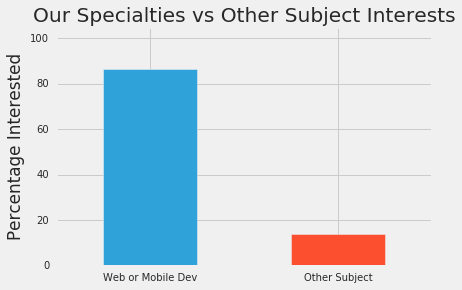

In [7]:
plt.style.use("fivethirtyeight")
specialty_interest.plot.bar()
plt.title("Our Specialties vs Other Subject Interests")
plt.xticks([0,1], ["Web or Mobile Dev", "Other Subject"], rotation=0)
plt.ylim([0,105])
plt.ylabel("Percentage Interested")
plt.show()

# Can we cater to specific interests with our specialties?

86% of people surveyed have interest in our best products! That's awesome news for our company: the high majority of people online express interest in at least one of our specialty courses.

We've confirmed this is representative data, and that our specialties strong interests with this sample. Let's dig into more details about our potential clientele. 

# Where do our best possible clients come from?

We're going to look at the backgrounds of each survey participant's different country of origin and residence. It makes sense to do this because we can tailor our advertisements to the largest possible demographic.

In [8]:
#We're going to drop people without declared interests. We're looking for the most likely of customers, and hesitance prevents purchases.

filtered_data = data[data["JobRoleInterest"].notnull()]

In [9]:
#These are the raw numbers of our sample-- absolute frequencies. 
filtered_data["CountryLive"].value_counts().head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [10]:
#We're analyzing the percentage each country contributes to this sample.
filtered_data["CountryLive"].value_counts(normalize=True).head(10) * 100

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: CountryLive, dtype: float64

# The USA & India

The USA and India would be the two primary markets for advertisement. They cover over 50% of the coverage, with the USA being the largest draw at 45%.

We can go deeper in our analysis, though. The USA experiences a lot of immigration, and we'd be remiss if we didn't examine the origin of its people. It could yield a large change.

In [11]:
filtered_data["CountryCitizen"].value_counts().head(4) #Absolute count of country origin

United States of America    2940
India                        612
United Kingdom               262
Canada                       229
Name: CountryCitizen, dtype: int64

In [12]:
filtered_data["CountryCitizen"].value_counts(normalize=True).head(4)*100 #Relative country contribution in our survey

United States of America    42.913443
India                        8.933002
United Kingdom               3.824259
Canada                       3.342578
Name: CountryCitizen, dtype: float64

# How many US citizens in our sample were from the US?

Most of them! The US percentange drops by approximately 3% when we consider country origin over residence. India gains about 1% of that change. The US & India are still our chiefest target customers by customer count. Count isn't everything, though.

# How much money could we expect to make from our target audience?

Our company sells subscriptions at a price of $59 a month. Who is the best fit for this product?

We'll narrow our analysis to the US, UK, Canada, and India. 

- These countries have the highest absolute frequencies in our search.
- Our courses are written in English. These countries have English as an official language.

In [13]:
#New column for the amount of money individuals spend per month
data["MoneyForLearningPerMonth"] = data["MoneyForLearning"] / data["MonthsProgramming"].replace(0, 1)
data["MoneyForLearningPerMonth"].value_counts(dropna=False).head(10)

 0.000000      7736
NaN            1995
 16.666667      317
 8.333333       315
 50.000000      292
 25.000000      278
 100.000000     252
 33.333333      239
 4.166667       222
 10.000000      214
Name: MoneyForLearningPerMonth, dtype: int64

The vast majority of people have spent 0 dollars. NaNs make up the 2nd highest value. 16.67 dollars take the third highest spot. 

- We need to group this data by countries to determine our product's best fit.

- We're going to remove NaNs since they don't inform us about anything. We're also going to remove rows with null values from CountryLive for the same reason.

In [14]:
non_null_data = data.copy()
non_null_data = non_null_data[non_null_data["CountryLive"].notnull()]
non_null_data = non_null_data[non_null_data["MoneyForLearningPerMonth"].notnull()]

In [15]:
country_monthly = non_null_data.groupby("CountryLive").mean()
country_monthly["MoneyForLearningPerMonth"].loc[["United States of America","India","United Kingdom", "Canada"]]

CountryLive
United States of America    206.297711
India                        66.526198
United Kingdom               55.774980
Canada                      118.434054
Name: MoneyForLearningPerMonth, dtype: float64

# Average Monthly Spending

This is peculiar. India & the United Kingdom are quite close, and India is even higher, in money spent for monthly online education. Given the GDP & PPP differences of the countries, that's very counterintuitive. One would expect the UK to be higher than India.

We need to graph this to determine if there are outliers affecting the means.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7f0b4aeea588>,
 <a list of 4 Text xticklabel objects>)

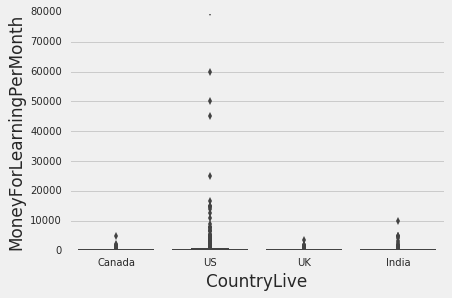

In [16]:
top_4 = non_null_data[non_null_data["CountryLive"].str.contains("United States of America|United Kingdom|Canada|India")]

sns.boxplot(x="CountryLive", y="MoneyForLearningPerMonth", data=top_4)
plt.xticks(range(4), ['Canada', 'US', 'UK', 'India'])

India has outliers which are vast for its economic situation, but it's nothing compared to the United States. It looks like there are several values above 25,000 USD per month. We're going to remove values above 20k. 

We're also going to focus more on people with proven drive to accomplish a career pursuit, so we're limiting the months spent programming to 3 for all countries. In our view, three months is a good marker of dedication.

Afterward, we'll examine some of the remaining outliers by hand to determine whether we should remove their rows.

In [17]:
top_4 = top_4[top_4["MoneyForLearningPerMonth"] <= 20000]
top_4 = top_4[top_4["MonthsProgramming"] >= 3]
country_monthly = top_4.groupby("CountryLive").mean()
country_monthly["MoneyForLearningPerMonth"].loc[["United States of America","India","United Kingdom", "Canada"]]

CountryLive
United States of America    154.095270
India                        41.319446
United Kingdom               49.714948
Canada                      124.510851
Name: MoneyForLearningPerMonth, dtype: float64

In [18]:
#Here we examine Indian outliers.
india_outliers = top_4[(top_4["CountryLive"] == "India") &
                       (top_4["MoneyForLearningPerMonth"] >= 3000)]

india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyForLearningPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,N

There is no confirmation these Indians are taking bootcamps, but they seem to have written their school costs as they are all attended university. Their language spoken at home is not English, so there might be a language barrier concerning the survey. We'll remove them from our consideration since we're looking at alternative education, not university.

In [19]:
#This code filters the outliers above.
top_4 = top_4.drop(india_outliers.index)

In [20]:
#Here we examine US outliers.
usa_outliers = top_4[(top_4["CountryLive"] == "United States of America") &
                    (top_4["MoneyForLearningPerMonth"] >= 5000)]

usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyForLearningPerMonth
2404,22.0,1.0,1.0,1.0,Telegraph Academy,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I work from home,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,1.0,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,8.0,31fd470771737279d533cfb7f1f741ff,afb4c1bcec993fd7147441046bd760a6,90000.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spanish,"single, never married",170000.0,24.0,0f3180698b,2017-03-10 21:41:03,2017-03-10 21:37:13,2017-03-10 21:42:41,2017-03-10 21:41:06,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,associate's degree,Sociology,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,7083.333333
3145,34.0,1.0,0.0,0.0,Hackbright Academy,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,United States of America,United States of America,NaN,Health/fitness,Employed for wages,NaN,90000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,40.0,e29098f26d55036f485b0bb5e0abaa7c,11548714ff39791bc9e863be63b89275,30000.0,1.0,0.0,0.0,1.0,Within the next 6 months,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"Game Developer, User Experience Designer, ...",no preference,English,"single, never married",17000.0,3.0,2627275a7d,2017-03-11 22:34:04,2017-03-11 22:31:18,2017-03-11 22:36:21,2017-03-11 22:34:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Cognitive Science,NaN,NaN,N

The USA has several rows where people declared they have not attended code camps, but are paying well over 10k USD. Several of them do not have 4-year college degrees, but have some credit. It's a safe assumption that some of these outliers are college students, and they are not people paying for code camp out of pocket.

We're going to drop people who have:

- not declared a code camp.
- spent 5000 USD per month or more.

In [21]:
#This code filters by the bullets above.
no_camp_us = top_4[(top_4["CountryLive"] == "United States of America") &
                (top_4["MoneyForLearningPerMonth"] >= 5000) &
                (top_4["AttendedBootcamp"] == 0)]

top_4 = top_4.drop(no_camp_us.index)

In [22]:
#Here we examine Canadian outliers.
canada_outlier = top_4[(top_4["CountryLive"] == "Canada") &
                        (top_4["MoneyForLearningPerMonth"] >= 2000)]
canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyForLearningPerMonth
6590,20.0,1.0,1.0,0.0,Lighthouse Labs,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,Canada,NaN,NaN,Not working but looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,054381efa7e21974d0e08e52c692ec26,42252a6541fa77d4fb490af12b7dcd30,NaN,1.0,0.0,0.0,NaN,I'm already applying,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,0.0,"Game Developer, Mobile Developer",no preference,Yue (Cantonese) Chinese,"single, never married",14023.0,6.0,1311b3960a,2017-03-21 04:29:52,2017-03-21 04:25:29,2017-03-21 04:33:20,2017-03-21 04:29:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,"trade, technical, or vocational training",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2337.166667


These actually look fine except for 8726. Akin to our American examples, the payments here appear to be university payments. We'll remove it with the same logic as above.

In [23]:
#This code filters the outliers above.
no_camp_canada = top_4[(top_4["CountryLive"] == "Canada") &
                (top_4["MoneyForLearningPerMonth"] >= 2000) &
                (top_4["AttendedBootcamp"] == 0)]

top_4 = top_4.drop(no_camp_canada.index)

# Cleaned Arithmetic Mean & Graph

In [24]:
clean_top_4 = top_4.groupby("CountryLive").mean()
clean_top_4["MoneyForLearningPerMonth"]

CountryLive
Canada                      124.510851
India                        29.303872
United Kingdom               49.714948
United States of America    143.025639
Name: MoneyForLearningPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7f0b4ae20780>,
 <a list of 4 Text xticklabel objects>)

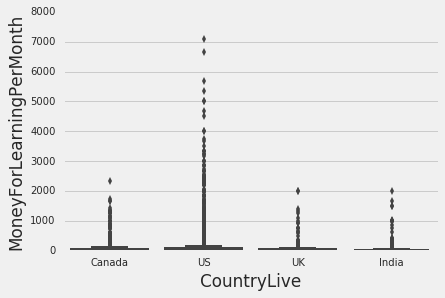

In [25]:
sns.boxplot(x="CountryLive", y="MoneyForLearningPerMonth", data=top_4)
plt.xticks(range(4), ['Canada', 'US', 'UK', 'India'])

While these countries still have outliers, we feel justified in keeping them since they seem legitimate. They have above 3-month participation, and they attended a code camp which justifies their high cost. 

We can see the United States is still a no-brainer for investment. Canada seems like the second best bet. Both of these countries have people who are willing to pay above our monthly fee for quality lessons & development.

But let's provide a more rational argument for that since the UK, India, and Canada are relatively close. We're going to look at:

- Absolute customer counts from our cleaned data
- Z-scores & how feasible our prices are for a given population

In [26]:
dedicated_careers_per_country = top_4["CountryLive"].value_counts()
average_payment_per_month = clean_top_4["MoneyForLearningPerMonth"]

usa_revenue = dedicated_careers_per_country[0] * average_payment_per_month[3]
canada_revenue = dedicated_careers_per_country[3] * average_payment_per_month[0]
uk_revenue = dedicated_careers_per_country[2] * average_payment_per_month[2]
india_revenue = dedicated_careers_per_country[1] * average_payment_per_month[1]

dedicated_careers_per_country

United States of America    4145
India                       1030
United Kingdom               551
Canada                       450
Name: CountryLive, dtype: int64

# Absolute Customer Count Summary

The United States has the most potential customers by far. Advertising there is still the first choice. India is a clear second by absolute counts, as we found earlier. The UK and Canada are far lesser, with Canada having the smallest absolute count of customers.

We need to dig more into price acceptability, by which we mean the likelihood that someone will buy our product by price alone. The UK has low spending per month, and fewer people involved, so we're going to omit them from analysis. The US is a given, so we're omitting that also. The choice really is between India and Canada.

- India has more people, but far less money spent per month.
- Canada has far more money spent per month, but less than half the people.

# Price Acceptability

Assuming all sampled Indians bought our product at 59 USD, they would be the clear pick over Canada. However, what is the likelihood someone will buy our product strictly on price? Since Canadians & US citizens spend twice more than our product's price per month, they seem like a clear pick over the UK and India.

Still, we need a rational argument for this. We're going to examine how many standard deviations away from the mean our price is for each country's monthly spending distribution.

- If our price (red) is to the left of the mean (black), then we're affordable.
- If our price (red) is to the right of the mean (black), then we're expensive.

In [27]:
#This filters our data for the two mentioned countries. We get the standard deviations ready for our charts below.
canada = top_4[top_4["CountryLive"] == "Canada"]
india = top_4[top_4["CountryLive"] == "India"]

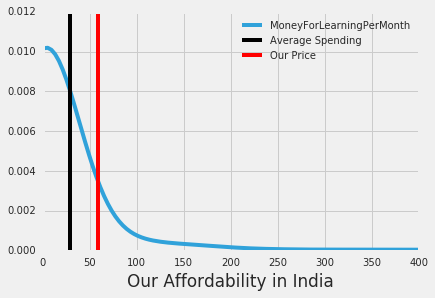

In [28]:
#This graphs India's spending distribution and compares the mean with our price.
india["MoneyForLearningPerMonth"].plot.kde(xlim=[india["MoneyForLearningPerMonth"].min(), 400])

plt.axvline(india["MoneyForLearningPerMonth"].mean(), color="black", label="Average Spending")
plt.axvline(59, color="red", label="Our Price")
plt.ylabel("")
plt.xlabel("Our Affordability in India")
plt.legend()
plt.show()

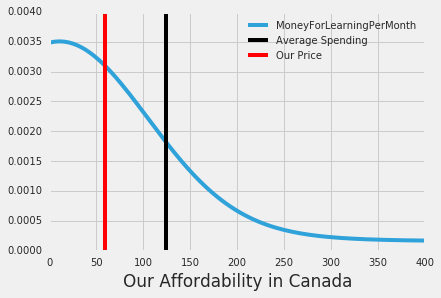

In [29]:
#This graphs Canada's spending distribution and compares the mean with our price.
canada["MoneyForLearningPerMonth"].plot.kde(xlim=[canada["MoneyForLearningPerMonth"].min(), 400])
plt.axvline(canada["MoneyForLearningPerMonth"].mean(), color="black", label="Average Spending")
plt.axvline(59, color="red", label="Our Price")
plt.ylabel("")
plt.xlabel("Our Affordability in Canada")
plt.legend()
plt.show()

In [30]:
#This cell figures the z-score, the number of standard deviations, for our price in both countries.

def z_score(array, value):
    std = np.std(array)
    mean = sum(array) / len(array)
    distance = value - mean
    score = distance / std
    return score

india_zscore = z_score(india["MoneyForLearningPerMonth"], 59)
canada_zscore = z_score(canada["MoneyForLearningPerMonth"], 59)
print("A positive score means the price is more expensive.")
print("A negative score means the price is more affordable.")
print("The Z-score for India is " + str(round(india_zscore, 2)))
print("The Z-score for Canada is " + str(round(canada_zscore, 2)))

A positive score means the price is more expensive.
A negative score means the price is more affordable.
The Z-score for India is 0.21
The Z-score for Canada is -0.21


# Z-Score Report

India has a z-score of 0.21, and Canada has a z-score of -0.21 when it comes to pricing our specialty projects. Canadians will find it much more affordable than their average monthly expenditure. This is a huge benefit for our marketing if we invest in Canada. All we'd need to worry about is marketing.

Our cost is more expensive in india, and while that market is more populated, it would likely take extra preparation to become their premium service provider of choice. We can't recommend this sector without changes to our product.

- We're going to recommend to our marketing team that they aim for the United States & Canada.

# Findings & Summary

The United States & Canada are the best two countries for our specialty products in web design & mobile design. They are already well tailored to our product financially, because they are likely to find it very affordable to their current, paid options.

- How much should our investments be in these countries? 70% US/30% Canada?
We'd ask the marketing team to evaluate how saturated the US market is with our content vs the Canadian market. How much of a takeaway market is there for services like ours in the US and Canada? Are there untapped demographics there? That would better determine an answer to the question above.

- "Does it make sense only to advertise in the US?"
Depending on the answer to the question above, it might. We'd recommend investing by the 80%/20% rule: 80% in the US, 20% in Canada. Depending on the return after a 3-month period, we can reevaluate the idea.

Thank you for reading. We hope you find this helpful.